In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
sea = pd.read_csv('/Users/Pawan Kumar/Downloads/SeaPlaneTravel.csv')

In [4]:
sea.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [5]:
from datetime import date

In [6]:
from statsmodels.tsa.stattools import acf,pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
from sklearn import metrics

In [8]:
sea.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
sea.Month=pd.to_datetime(sea.Month)

In [11]:
sea_indexed  = sea.set_index('Month')

In [12]:
sea_indexed.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [13]:
ts = sea_indexed['#Passengers']

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


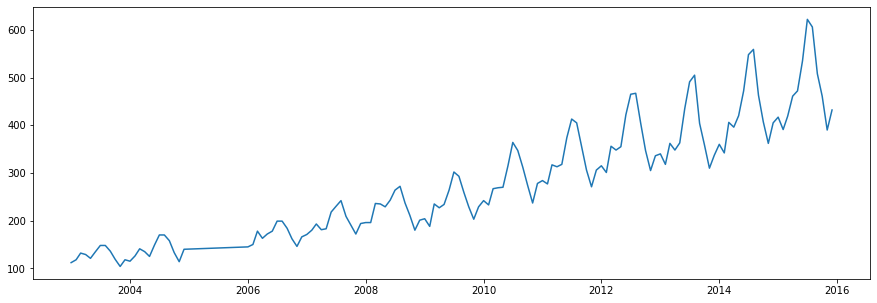

In [14]:
plt.figure(figsize=(15,5))
plt.plot(ts)

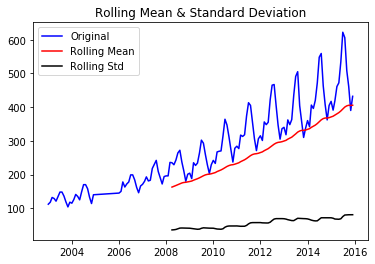

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [15]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(ts)

# Since the P-value is very large hece we cannot say that the data is stationary

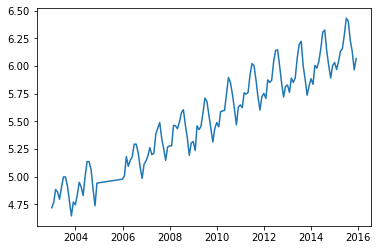

In [23]:
ts_log = np.log(ts)
# ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log)

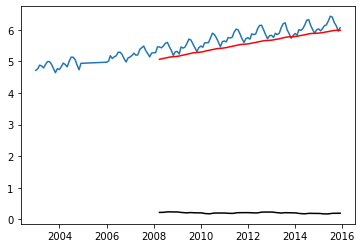

In [27]:
rol_log_mean = ts_log.rolling(window=52,center=False).mean() 
plt.plot(ts_log)
rol_log_std = ts_log.rolling(window=52,center=False).std()
log_std = plt.plot(rol_log_std, color='black', label = 'Rolling Std')
log_mean = plt.plot(rol_log_mean, color='red', label='Rolling Mean')


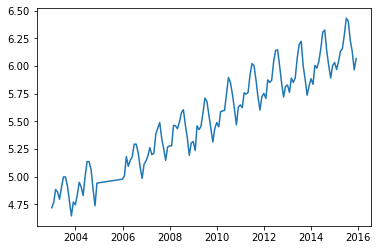

In [28]:
ts_log = np.log(ts)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log)

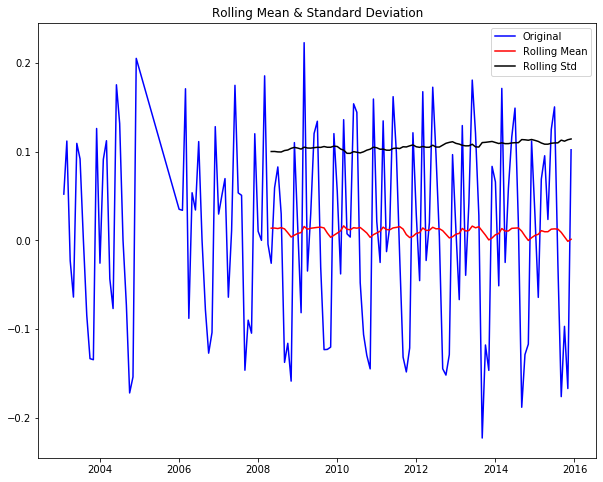

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [32]:
plt.figure(figsize=(10,8))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [19]:
import statsmodels.api as sm

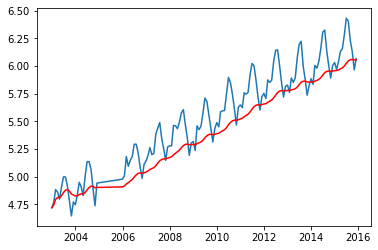

In [30]:
Exponential_weighted_average = ts_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(ts_log)
plt.plot(Exponential_weighted_average, color='red')

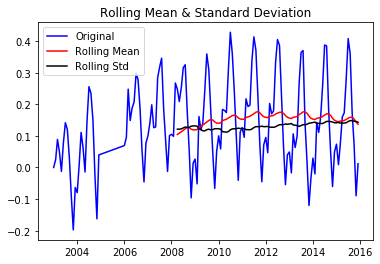

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
Diff_Exponentialto_log = ts_log - Exponential_weighted_average
test_stationarity(Diff_Exponentialto_log)

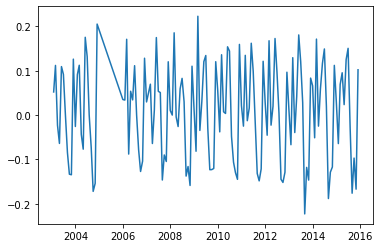

In [41]:
data_after_shifting_the_log = ts_log- ts_log.shift()
plt.plot(data_after_shifting_the_log)

In [42]:
data_after_shifting_the_log=data_after_shifting_the_log.dropna()

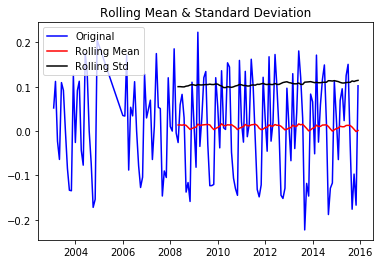

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [43]:
test_stationarity(data_after_shifting_the_log)

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose


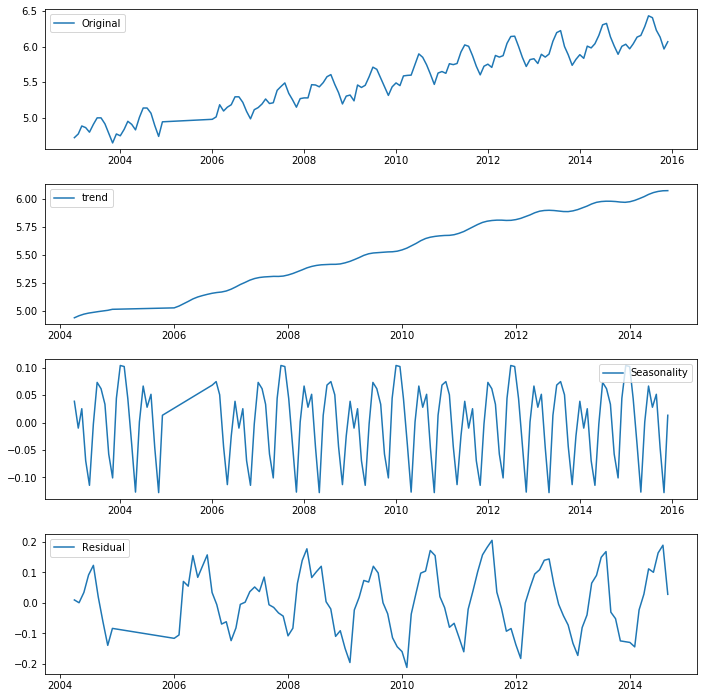

In [80]:
# Decomposing the data
plt.figure(figsize=(10,10))
decomposition = seasonal_decompose(ts_log, freq=30, )
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')
plt.tight_layout(pad =1.8)

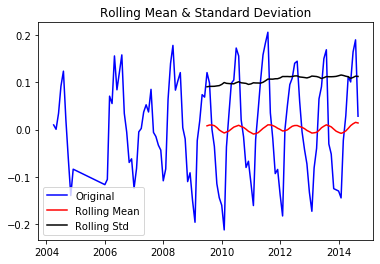

Results of Dickey-Fuller Test:
Test Statistic                  -3.031516
p-value                          0.032054
#Lags Used                      13.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64


In [84]:
residual.dropna(inplace=True)
test_stationarity(residual)

In [86]:
#ACF and PACF
lag_acf = acf(data_after_shifting_the_log, nlags=10)
lag_pacf = pacf(data_after_shifting_the_log, nlags=10, method='ols')

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


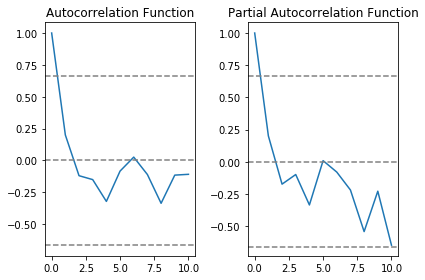

In [88]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(data_after_shifting_the_log)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(data_after_shifting_the_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(data_after_shifting_the_log)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(data_after_shifting_the_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

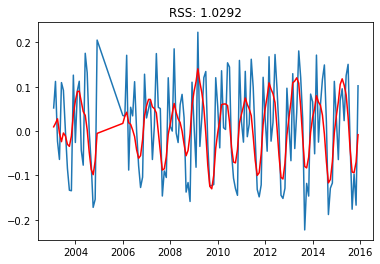

In [95]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(data_after_shifting_the_log)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_after_shifting_the_log)**2))

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Mon, 09 Mar 2020   AIC                           -287.281
Time:                        21:08:37   BIC                           -269.504
Sample:                             1   HQIC                          -280.057
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.D.#Passengers     1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.D.#Passeng

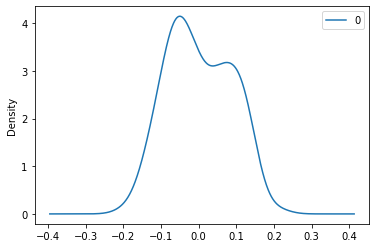

In [97]:
print(results_ARIMA.summary())
# plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())

In [98]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
2003-02-01    0.009580
2003-03-01    0.017491
2003-04-01    0.027670
2003-05-01   -0.004521
2003-06-01   -0.023890
dtype: float64


In [99]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
2003-02-01    0.009580
2003-03-01    0.027071
2003-04-01    0.054742
2003-05-01    0.050221
2003-06-01    0.026331
dtype: float64

In [101]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2003-01-01    4.718499
2003-02-01    4.728079
2003-03-01    4.745570
2003-04-01    4.773241
2003-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1044')

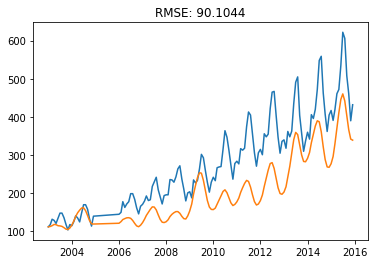

In [104]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [105]:
ts_log

Month
2003-01-01    4.718499
2003-02-01    4.770685
2003-03-01    4.882802
2003-04-01    4.859812
2003-05-01    4.795791
                ...   
2015-08-01    6.406880
2015-09-01    6.230481
2015-10-01    6.133398
2015-11-01    5.966147
2015-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


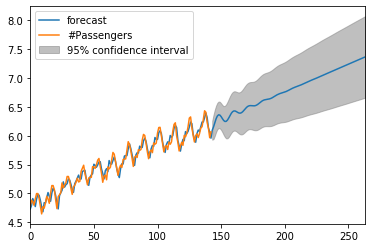

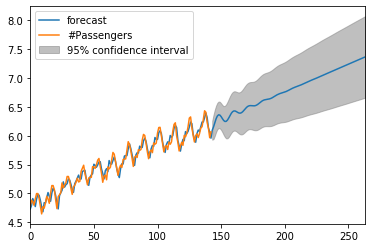

In [106]:
results_ARIMA.plot_predict(1,264)


In [107]:
results_ARIMA.forecast(steps = 120)

(array([6.09553397, 6.15281409, 6.2244297 , 6.29241103, 6.34164716,
        6.36359359, 6.35784682, 6.33139301, 6.29597537, 6.26447711,
        6.24738323, 6.25025169, 6.27275833, 6.30940308, 6.35151489,
        6.38988652, 6.41727379, 6.43011054, 6.4290669 , 6.4184249 ,
        6.40456155, 6.39403615, 6.3918308 , 6.40019499, 6.41833687,
        6.44295402, 6.46937431, 6.49293983, 6.51024118, 6.51989034,
        6.52267581, 6.52112389, 6.51864527, 6.51853688, 6.5231192 ,
        6.53322356, 6.54812865, 6.56591553, 6.58410306, 6.60036538,
        6.61313266, 6.62192782, 6.6273779 , 6.6309313 , 6.63438689,
        6.63937984, 6.64696502, 6.65739838, 6.67015322, 6.68414249,
        6.69806625, 6.710779  , 6.72157732, 6.73033985, 6.73749812,
        6.74386379, 6.75037323, 6.75782592, 6.76668681, 6.77699822,
        6.78841318, 6.80032852, 6.81207194, 6.8230876 , 6.83307137,
        6.84202493, 6.85022313, 6.85811222, 6.86617341, 6.87479151,
        6.88416302, 6.89426383, 6.90487889, 6.91